## Ejercicio 2

Escribe una función en Python que encuentre los valores de $a$, $b$, y $c$ para que la función cuadrática $f(x) = a x^2 + b x + c$ pase exactamente por los siguientes puntos:

$x, y = \{(0, 0), (1, 8), (2, 12), (3, 12), (5, 0)\}$

### Nota:
Se sabe que los coeficientes deben ser enteros y estan en el rango de $-10$ a $10$.

In [2]:
# Lo importamos al inicio para que este disponible para todo el codigo siguiente 

import numpy as np
import matplotlib.pyplot as plt

## Solución con Python 'puro'

Dada la simplicidad del planteo esto puede ser resuelto matematicamente de manera muy simple, la solución es: $$ a = -2; b = 10; c = 0 $$

Sin embargo vamos a dar una solución con Python para que sea más general y pueda ser aplicada a problemas más complejos.

Hagamos una primera aproximación, asumiendo que los coeficientes son enteros y la solucion es exacta. 

En este caso basta con recorrer todas las posibilidades y elegir la que cumpla con los puntos dados.


In [3]:
##
## Solución Python pura ##
##


# Definimos la función cuadrática f(x) = a*x^2 + b*x + c
def f(x, a, b, c):
    return a * x**2 + b * x + c


# Exploramos todas las combinaciones posibles de a, b y c
def buscarCoeficientes(X,Y, rango=range(-10, 11)):
    for a in rango:
        for b in rango:
            for c in rango:
                # Calculamos los valores de y para cada combinación de a, b y c
                y = [f(x, a, b, c) for x in X]
                # Verificamos si los valores calculados coinciden exactamente con los valores de Y
                if y == Y:
                    # Si coinciden, imprimimos los valores de a, b y c
                    return a, b, c
    return None

# Definimos los puntos X y Y
X = [0, 1,  2,  3, 5]
Y = [0, 8, 12, 12, 0]

coeficientes = buscarCoeficientes(X,Y, rango=range(-10, 11))

if coeficientes:
    print(f'Los coeficientes son: {coeficientes}')
else:
    print('No se encontraron coeficientes que cumplan con los valores de Y')

Los coeficientes son: (-2, 10, 0)


Vamos a hacer mas general el problema, asumiremos que la solucion no es exacta y que los coeficientes pueden ser reales.

En este caso la solucion no va a ser exacta por lo vamos a elegir los coeficientes que minimicen el error. 

Una forma de estimar el error es usa la suma de los cuadrados de los errores, es decir, la suma de los cuadrados de las diferencias entre el valor real y el valor calculado por la funcion cuadratica. 

Ademas podemos usar numpy para facilitar los calculos. 

In [4]:
## Solución Python con numpy puro ##
import numpy as np

# Convertimos las listas X y Y a arrays de numpy

# Definimos la función cuadrática f(x) = a*x^2 + b*x + c
def f(x, a,b,c):
    return a * x**2 + b * x + c

def error(y,yp):
    return np.sum((y-yp)**2)

# Definimos el rango de valores para a, b y c

# Exploramos todas las combinaciones posibles de a, b y c
def buscarCoeficientes(X, Y, rango = np.arange(-10, 11)):
    print(f"\nBuscando entre {len(rango)**3} combinaciones")
    coeficientes = None 
    menorError = np.inf

    for a in rango:
        for b in rango:
            for c in rango:
                # Calculamos los valores de y para cada combinación de a, b y c
                nuevosCoeficientes = np.array([a, b, c])
                y = f(X, *nuevosCoeficientes)

                nuevoError = error(Y, y)
                if nuevoError < menorError:
                    menorError = nuevoError 
                    coeficientes = nuevosCoeficientes
    print(f"El error es de {menorError:.2f}\n")
    return coeficientes

X = np.array([0, 1, 2, 3, 5])
Y = np.array([0, 8, 12, 12, 0])

coeficientes = buscarCoeficientes(X,Y, np.arange(-10,11, 1))
print(f'Los coeficientes son {coeficientes.round(1)}')
#> Los coeficientes son [-2 10 0]



Buscando entre 9261 combinaciones
El error es de 0.00

Los coeficientes son [-2 10  0]


Este nuevo algoritmo funciona aun cuando los coeficientes no son enteros y la solucion no es exacta.

In [5]:
X = np.array([0, 1, 2, 3, 5])
Y = np.array([0, 8, 12, 11, 0]) # Cambiamos el 12 por 11 para que no coincida con la función cuadrática

coeficientes = buscarCoeficientes(X,Y, np.arange(-10,11, 1)) # Probamos 21 * 21 * 21 combinaciones = 9261 combinaciones
print(f'Los coeficientes son {coeficientes.round(1)}')
#> El error es de 1.00
#> Los coeficientes son [-2 10 0] 



Buscando entre 9261 combinaciones
El error es de 1.00

Los coeficientes son [-2 10  0]


Incluso podemos controlar al precisión de la respuesta haciendo que explore no solo valores enteros sin con numeros reales (en esta caso con un decimal)

In [6]:
coeficientes = buscarCoeficientes(X,Y, np.arange(-10, 11, .1)) # Cambiamos 1.0 por 0.1
print(f'Los coeficientes son {coeficientes.round(1)}')


Buscando entre 9261000 combinaciones
El error es de 0.58

Los coeficientes son [-1.9  9.4  0.3]


Esto funciona pero se vuelve prohibitivamente lento, en este caso paso de una respuesta instantanea a demorar mas de 30 segundos. Paso de probar 9.261 casos a probar 9.261.000 combinaciones. 

Si quisieramos 2 decimales tendria que probar 9.261.000.000 (Demorando casi medio día 🤯)

y si trataramos de encontrar un polinomio mas grande el tiempo creceria en forma exponencial !!!

Hay que probar otro algoritmo, uno que nos permite recorrer el espacio de soluciones en forma mas eficiente

Si no podemos probar todos los valores empecemos con un valor inicial e intentemos ir acercandonos a la solución en forma progresiva 

Esto es lo que se conoce como el algoritmo del `gradiente estocastico` 

In [14]:
## Solución con numpy (usando funciones de polinomios) ##
import numpy as np

# Una funcion mas general que calcula el polinomio en funcion de cuantos coeficientes recibe 
def f(x, coeficientes):
    return np.poly1d(coeficientes)(x)

def error(y,yp):
    return np.sum((y-yp)**2)

def buscarCoeficientes(X,Y,orden=5,maximo=10_000):
    coeficientes = np.random.randint(-10,10,orden+1) # Genero 3 coeficientes al azar
    errorActual  = np.inf 
    
    distancia = 0.01
    repeticiones = 0 

    while errorActual > .1 and repeticiones < maximo:
        # Genera 'perturvaciones' a los coeficientes 
        # me genera coeficientes 'cercanos' al original agregandole valores a alzar 
        nuevosCoeficientes = coeficientes + distancia * np.random.randint(-10,10,len(coeficientes))
        
        y = f(X, nuevosCoeficientes)
        nuevoError = error(Y, y )
        
        # Si reduce el error recordar los coeficientes
        if nuevoError < errorActual:
            errorActual = nuevoError
            coeficientes = nuevosCoeficientes

        repeticiones += 1 

    print(f"El error fue de {errorActual:.1f} despues de {repeticiones} intentos")
    return coeficientes

x = np.array([ 0,  1,  2,  3,  5])
y = np.array([ 0,  8, 12, 11,  0])

coeficientes = buscarCoeficientes(x, y, 2, 2000000)
print(f"Los coeficientes son {coeficientes.round(2)}")
print(np.polyfit(x, y, 2).round(2))

El error fue de 0.5 despues de 2000000 intentos
Los coeficientes son [-1.92  9.54  0.19]
[-1.92  9.55  0.18]


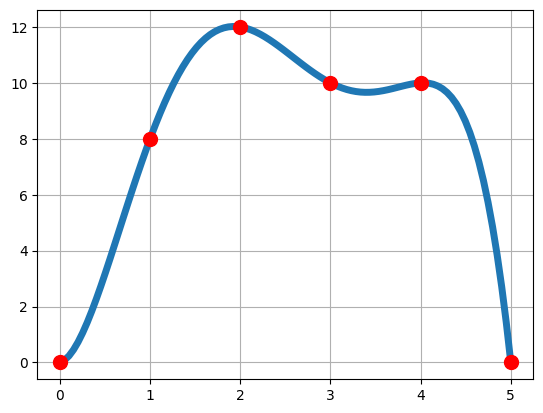

In [44]:
import numpy as np # type: ignore

x = np.array([ 0,  1,  2,  3, 4, 5])
y = np.array([ 0,  8, 12, 10, 10, 0])

def dibujar(x, y, f=None):
    xr = np.linspace(min(x), max(x), 100)
    if f: 
        plt.plot(xr, f(xr), linewidth=5)
    plt.plot(x, y, 'ro', markersize=10)
    plt.grid()

coeficientes = np.polyfit(x,y,5)
dibujar(x,y,lambda x: f(x, coeficientes))


In [9]:
import numpy as np

# Función que calcula el polinomio evaluado en x dado los coeficientes
def f(x, coeficientes):
    return np.polyval(coeficientes, x)

def error(y, yp):
    return np.sum((y - yp)**2)

def buscarCoeficientes(X, Y, grado=2, maximo=100000):
    n = grado + 1
    coeficientes = np.random.randint(-10,10,n)
    errorActual  = np.inf

    aprendizaje = 0.0001  # Tasa de aprendizaje reducida
    epocas = 0

    while errorActual > 0.1 and epocas < maximo:
        # Calcular las predicciones
        y = f(X, coeficientes)

        # Calcular el error
        errorActual = error(Y, y)

        # Calcular los gradientes
        diferencia = (Y - y) # Diferencia entre los valores reales y los predichos
        # gradientes = np.array([
        #     -2 * np.sum(diferencia * X ** 2), # Derivada parcial de a
        #     -2 * np.sum(diferencia * X ** 1), # Derivada parcial de b
        #     -2 * np.sum(diferencia * X ** 0)  # Derivada parcial de c
        # ])

        gradientes = np.zeros(n, dtype=np.float64)
        for i in range(n):
            p = n - i - 1
            gradientes[i] = -2 * np.sum(diferencia * (X ** p))
     
        # Actualizar los coeficientes
        coeficientes = coeficientes -  aprendizaje * gradientes

        epocas += 1

    print(f"El error fue de {errorActual:.1f} después de {epocas} intentos")
    return coeficientes

x = np.array([0, 1, 2, 3, 5], dtype=np.float64)
y = np.array([0, 8, 12, 11, 0],dtype=np.float64)

coeficientes = buscarCoeficientes(x, y, 2, 100_000)
print(f"Los coeficientes son {coeficientes.round(2)}")
print(f"Coeficientes obtenidos con np.polyfit: {np.polyfit(x, y, 2).round(2)}")

El error fue de 0.5 después de 100000 intentos
Los coeficientes son [-1.92  9.55  0.18]
Coeficientes obtenidos con np.polyfit: [-1.92  9.55  0.18]


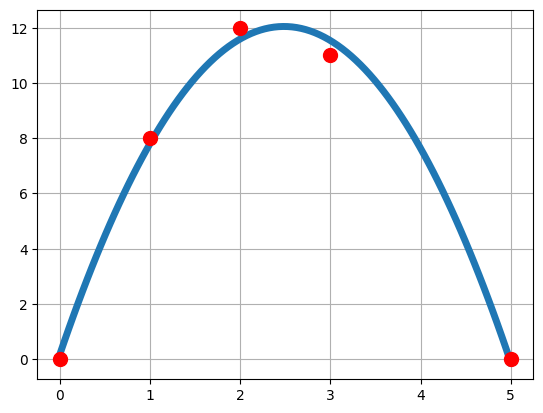

In [10]:
# Regresión (con polinomios) 

x = np.array([ 0, 1, 2, 3, 5])
y = np.array([ 0, 8,12,11, 0]) # Cambio el 12 por 11

def f(x, a, b, c):
    return a*x**2 + b*x + c

coeficientes = np.polyfit(x,y,2)
dibujar(x,y, lambda x: f(x, *coeficientes))